In [6]:
import pandas as pd 
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
diabetes_df = pd.read_csv("diabetes.csv")

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=32,stratify = y)

#standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

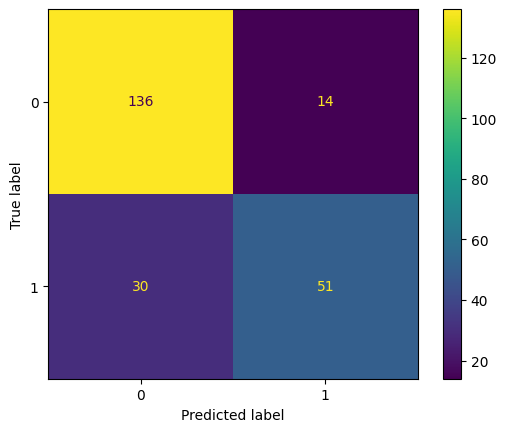

In [44]:
from sklearn.ensemble import RandomForestClassifier
# Random forest is aggregated decision trees
rf = RandomForestClassifier(n_estimators=500, random_state=32)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [41]:
51/(51+30)

0.6296296296296297

In [26]:
print(rf.feature_importances_, X.columns)

[0.06735555 0.37160839 0.0490424  0.03560783 0.05406331 0.16273057
 0.08241191 0.17718004] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


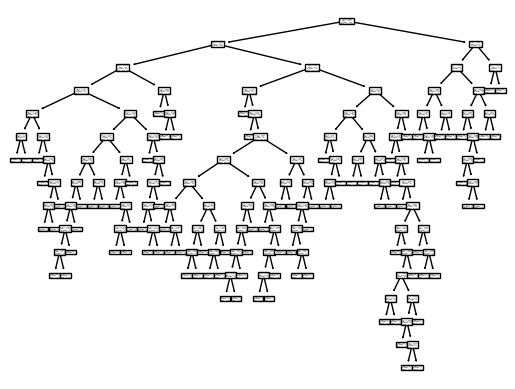

In [30]:
import matplotlib.pyplot as plt
tree_5 = rf.estimators_[4]
tree.plot_tree(tree_5)
plt.savefig("rf_tree.svg")

In [45]:
#look at the documentation for random forest and see what is avaliable to improve the model
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 2.4 MB/s eta 0:00:42
   ---------------------------------------- 0.6/99.8 MB 5.9 MB/s eta 0:00:17
   ---------------------------------------- 1.2/99.8 MB 8.4 MB/s eta 0:00:12
    --------------------------------------- 2.1/99.8 MB 11.3 MB/s eta 0:00:09
   - -------------------------------------- 3.0/99.8 MB 13.0 MB/s eta 0:00:08
   - -------------------------------------- 3.8/99.8 MB 13.5 MB/s eta 0:00:08
   - -------------------------------------- 4.5/99.8 MB 13.7 MB/s eta 0:00:07
   -- ------------------------------------- 5.1/99.8 MB 13.6 MB/s eta 0:00:07
   -- ------------------------------------- 5.9/99.8 MB 14.5 MB/s eta 0:00:07
   -- ------------------------------------- 7.1/99.8 MB 15.1 MB/s eta 0:00:07
   --- ------------------------------------ 8.2/99.8 MB 15.3 MB/s eta 0:00:


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)


In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
# ROC = reciving operating characteristic curve
# ROC curves summarize the trade-off between true positives 
# And false positives. They are most appropiate for balanced datasets
# Can be overly optimistic for severly imbalanced classification problems
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
# higher auc shows a better model typciallsy.
auc

0.7333333333333333

<module 'matplotlib.pyplot' from 'C:\\Users\\jedwa\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

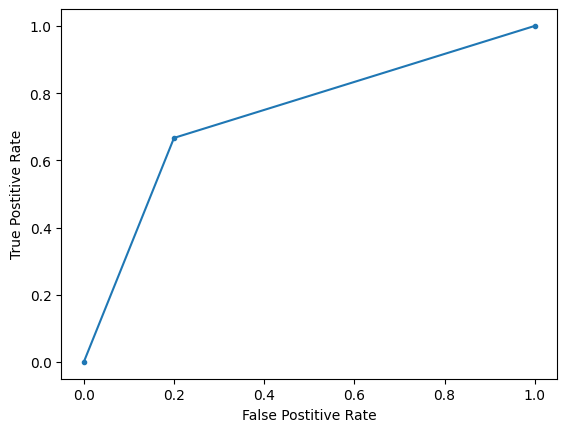

In [50]:
plt.plot(fpr, tpr, marker = '.')
plt.xlabel("False Postitive Rate")
plt.ylabel("True Postitive Rate")
plt